In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wget

In [ ]:
import os

In [96]:
url = 'https://covid19.who.int/WHO-COVID-19-global-table-data.csv'

In [98]:
if os.path.exists('data.csv'):
	os.remove('data.csv')
	wget.download(url, 'data.csv')
else:
	wget.download(url, 'data.csv')

In [91]:
import pandas as pd

In [92]:
import seaborn as sns

In [93]:
import matplotlib.pyplot as plt

In [94]:
import numpy as np

In [146]:
df=pd.read_csv("data.csv")

In [147]:
df_copy=df.copy()

In [149]:
df_copy.rename(columns = {'Name':'Landmass','WHO Region':'Cases - cumulative total','Cases - cumulative total':'Cases - cumulative total per 100000 population','Cases - cumulative total per 100000 population':'Cases - newly reported in last 7 days','Cases - newly reported in last 7 days':'Cases - newly reported in last 7 days per 100000 population','Cases - newly reported in last 7 days per 100000 population':'Cases - newly reported in last 24 hours','Cases - newly reported in last 24 hours':'Deaths - cumulative total','Deaths - cumulative total':'Deaths - cumulative total per 100000 population','Deaths - cumulative total per 100000 population':'Deaths - newly reported in last 7 days','Deaths - newly reported in last 7 days':'Deaths - newly reported in last 7 days per 100000 population','Deaths - newly reported in last 7 days per 100000 population':'Deaths - newly reported in last 24 hours','Deaths - newly reported in last 24 hours':'Nothing'}, inplace = True)

In [151]:
df_copy=df_copy.drop(columns=['Nothing'])

In [153]:
df_copy=df_copy.dropna()

In [155]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, United States of America to Turkmenistan
Data columns (total 11 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Landmass                                                      236 non-null    object 
 1   Cases - cumulative total                                      236 non-null    int64  
 2   Cases - cumulative total per 100000 population                236 non-null    float64
 3   Cases - newly reported in last 7 days                         236 non-null    int64  
 4   Cases - newly reported in last 7 days per 100000 population   236 non-null    float64
 5   Cases - newly reported in last 24 hours                       236 non-null    int64  
 6   Deaths - cumulative total                                     236 non-null    int64  
 7   Deaths - cumulative total per 100000 populat

In [182]:
df_copy=df_copy.assign(DeathRate24Hours=(df_copy['Deaths - newly reported in last 24 hours']/df_copy['Cases - newly reported in last 24 hours'])*100)
df_copy=df_copy.assign(DeathRate7Days=(df_copy['Deaths - newly reported in last 7 days']/df_copy['Cases - newly reported in last 7 days'])*100)
df_copy=df_copy.assign(DeathRateTotal=(df_copy['Deaths - cumulative total']/df_copy['Cases - cumulative total'])*100)


df_copy

,Landmass,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,DeathRate24Hours,DeathRate7Days,DeathRateTotal
United States of America,Americas,93580725,28271.896,476675,144.009,25686,1036949,313.275,2423,0.732,67,0.260842,0.508313,1.108080
India,South-East Asia,44472241,3222.616,43848,3.177,5379,528057,38.265,183,0.013,27,0.501952,0.417351,1.187386
Brazil,Americas,34477539,16220.189,80334,37.794,0,684425,321.992,803,0.378,0,NaN,0.999577,1.985133
France,Europe,33599863,51660.815,105883,162.798,26918,150804,231.866,281,0.432,60,0.222899,0.265387,0.448823
Germany,Europe,32344032,38890.599,181064,217.712,33311,147981,177.933,45,0.054,4,0.012008,0.024853,0.457522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Palau,Western Pacific,5403,29864.028,55,304.002,0,6,33.164,0,0.000,0,NaN,0.000000,0.111049
Anguilla,Americas,3851,25669.911,14,93.321,0,11,73.324,0,0.000,-1,-inf,0.000000,0.285640
Sint Eustatius,Americas,1194,38037.592,5,159.286,5,5,159.286,0,0.000,0,0.000000,0.000000,0.418760
Montserrat,Americas,1190,23804.761,64,1280.256,0,8,160.032,0,0.000,0,NaN,0.000000,0.672269


In [183]:
df_copy=df_copy.dropna()

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Text(0.5, 1.0, 'Death Rate of Last 24 Hours')

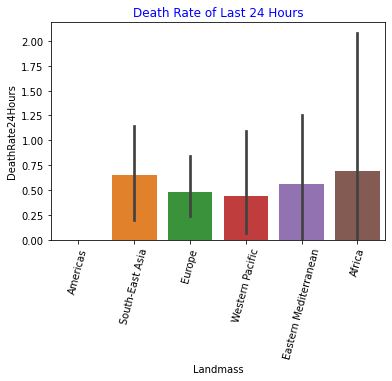

In [185]:
#plt.figure(figsize = (12,10))
sns.barplot(x=df_copy['Landmass'],y=df_copy['DeathRate24Hours'])
plt.xticks(rotation = '75')
plt.title("Death Rate of Last 24 Hours",color='Blue')

Text(0.5, 1.0, 'Death Rate of Last 7 Days')

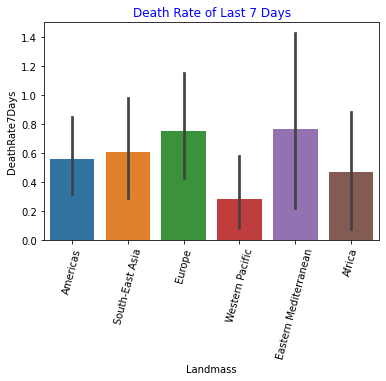

In [187]:
#plt.figure(figsize = (12,10))
sns.barplot(x=df_copy['Landmass'],y=df_copy['DeathRate7Days'])
plt.xticks(rotation = '75')
plt.title("Death Rate of Last 7 Days",color='Blue')

Text(0.5, 1.0, 'Total Death Rate')

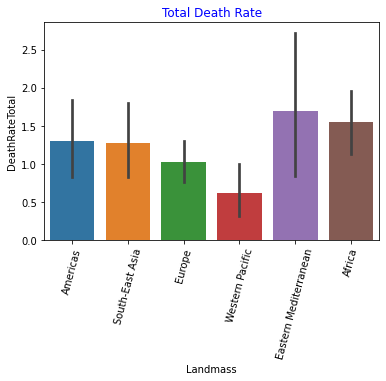

In [188]:
#plt.figure(figsize = (12,10))
sns.barplot(x=df_copy['Landmass'],y=df_copy['DeathRateTotal'])
plt.xticks(rotation = '75')
plt.title("Total Death Rate",color='Blue')